In [1]:
from io import BytesIO
import requests
import pandas as pd
from arcgis.features import FeatureLayer
from arcgis.gis import GIS
from arcgis.mapping import WebMap

In [148]:
from arcgis.gis import GIS
gis = GIS("https://utoronto.maps.arcgis.com",client_id="D6mmWslBBmHA1RuS", verify_cert=False)
print("Successfully logged in as: " + gis.properties.user.username)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://utoronto.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=D6mmWslBBmHA1RuS&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=FiW7LYt9iKlWh4CL1oXY5G1QEUoQAw&allow_verification=false
Enter code obtained on signing in using SAML: ········
Successfully logged in as: yangch53_utoronto


<Item title:"Coronavirus COVID-19 (2019-nCoV)" type:Dashboard owner:CSSE_covid19>
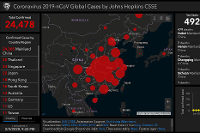

In [3]:
item = gis.content.search("Coronavirus_2019_nCoV_Cases owner:CSSE_covid19", outside_org=True)[0]
item

In [4]:
src_url = "https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1"
fl = FeatureLayer(url=src_url)

In [5]:
df_global = fl.query(where="1=1",
                     return_geometry=True,
                     as_df=True)

In [7]:
df_global[df_global['Country_Region']=="US"]

,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key,SHAPE
733,734,Mississippi,US,2022-09-11 05:20:45,32.741646,-89.678696,918874,0,12821,0,None,28,"Mississippi, US","{""x"": -89.67869599999995, ""y"": 32.741646000000..."
734,735,Grand Princess,US,2020-08-04 02:27:56,37.648940,-122.665479,103,0,3,0,None,None,"Grand Princess, US","{""x"": -122.66547899999995, ""y"": 37.64894000000..."
735,736,Oklahoma,US,2022-09-11 05:20:45,35.565342,-96.928917,1182071,0,16759,0,None,40,"Oklahoma, US","{""x"": -96.92891699999996, ""y"": 35.565342000000..."
736,737,Delaware,US,2022-09-11 05:20:45,39.318523,-75.507141,304393,0,3080,0,None,10,"Delaware, US","{""x"": -75.50714099999993, ""y"": 39.318523000000..."
737,738,Minnesota,US,2022-09-11 05:20:45,45.694454,-93.900192,1645653,0,13509,0,None,27,"Minnesota, US","{""x"": -93.90019199999995, ""y"": 45.694454000000..."
738,739,Illinois,US,2022-09-11 05:20:45,40.349457,-88.986137,3716318,0,39445,0,None,17,"Illinois, US","{""x"": -88.98613699999999, ""y"": 40.349457000000..."
739,740,Arkansas,US,2022-09-11 05:20:45,34.969704,-92.373123,941464,0,11961,0,None,05,"Arkansas, US","{""x"": -92.37312299999996, ""y"": 34.969704000000..."
740,741,New Mexico,US,2022-09-11 05:20:45,34.840515,-106.248482,613896,0,8483,0,None,35,"New Mexico, US","{""x"": -106.24848199999997, ""y"": 34.84051500000..."
741,742,Indiana,US,2022-09-11 05:20:45,39.849426,-86.258278,1908325,0,24549,0,None,18,"Indiana, US","{""x"": -86.25827799999996, ""y"": 39.849426000000..."
742,743,Louisiana,US,2022-09-11 05:20:45,31.169546,-91.867805,1442885,0,17923,0,None,22,"Louisiana, US","{""x"": -91.86780499999998, ""y"": 31.169546000000..."


In [8]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OBJECTID        793 non-null    int64         
 1   Province_State  793 non-null    object        
 2   Country_Region  793 non-null    object        
 3   Last_Update     792 non-null    datetime64[ns]
 4   Lat             773 non-null    float64       
 5   Long_           773 non-null    float64       
 6   Confirmed       793 non-null    int32         
 7   Recovered       793 non-null    int32         
 8   Deaths          793 non-null    int32         
 9   Active          793 non-null    int32         
 10  Admin2          793 non-null    object        
 11  FIPS            793 non-null    object        
 12  Combined_Key    793 non-null    object        
 13  SHAPE           773 non-null    geometry      
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(4), i

In [9]:
df_global.groupby('Country_Region').sum()[['Confirmed', 'Recovered', 'Deaths']]

,Confirmed,Recovered,Deaths
Country_Region,,,
Afghanistan,195631,0,7787
Albania,330948,0,3584
Algeria,270532,0,6879
Andorra,46113,0,155
Angola,103131,0,1917
...,...,...,...
West Bank and Gaza,702591,0,5706
Winter Olympics 2022,535,0,0
Yemen,11932,0,2155


In [10]:
fset_world = df_global.groupby('Country_Region').sum()[['Confirmed', 'Recovered', 'Deaths']]

<Item title:"World Country Boundaries 2019" type:Feature Layer Collection owner:esri_dm>
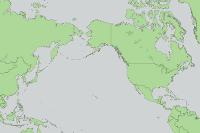

In [11]:
countries_item = gis.content.get('7d721e9b74bf4b16bd43dfe489a5a533')
countries_item

In [12]:
countries_flayer = countries_item.layers[1]
countries_df = countries_flayer.query(as_df=True)
countries_df.columns

Index(['OBJECTID', 'FIPS_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT', 'NAME',
       'LONG_NAME', 'LOCSHRTNAM', 'LOCLNGNAM', 'CAPITAL', 'COUNTRYAFF',
       'CONTINENT', 'COLORMAP', 'Shape__Area', 'Shape__Length', 'SHAPE'],
      dtype='object')

In [26]:
map_country_list = countries_df["NAME"].unique()

In [18]:
fset_world = fset_world.reset_index()

In [23]:
country_list = fset_world["Country_Region"].tolist()

In [25]:
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Biss

In [27]:
countries_not_included = list()

In [28]:
for i in range(len(country_list)):
    if country_list[i] in map_country_list:
        pass
    else:
        countries_not_included.append(country_list[i])

In [29]:
countries_not_included

['Brunei',
 'Burma',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Czechia',
 'Diamond Princess',
 'Eswatini',
 'Holy See',
 'Korea, North',
 'Korea, South',
 'Kosovo',
 'MS Zaandam',
 'Russia',
 'Summer Olympics 2020',
 'Taiwan*',
 'US',
 'West Bank and Gaza',
 'Winter Olympics 2022']

In [30]:
fset_world.loc[fset_world['Country_Region']=='US', 'Country_Region'] = 'United States'
fset_world.loc[fset_world['Country_Region']=='Korea, South', 'Country_Region'] = 'South Korea'
fset_world.loc[fset_world['Country_Region']=='Korea, North', 'Country_Region'] = 'North Korea'
fset_world.loc[fset_world['Country_Region']=='Russia', 'Country_Region'] = 'Russian Federation'
fset_world.loc[fset_world['Country_Region']=='Czechia', 'Country_Region'] = 'Czech Republic'

In [31]:
countries_not_included2 = list()
country_list2 = fset_world["Country_Region"].tolist()
for i in range(len(country_list2)):
    if country_list2[i] in map_country_list:
        pass
    else:
        countries_not_included2.append(country_list2[i])
countries_not_included2

['Brunei',
 'Burma',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Diamond Princess',
 'Eswatini',
 'Holy See',
 'Kosovo',
 'MS Zaandam',
 'Summer Olympics 2020',
 'Taiwan*',
 'West Bank and Gaza',
 'Winter Olympics 2022']

In [33]:
fset_world = fset_world.drop(fset_world[fset_world.Country_Region.isin(countries_not_included2)].index)

In [36]:
world_merged = pd.merge(fset_world, countries_df[['NAME', 'SHAPE']], left_on = "Country_Region", \
                         right_on='NAME', how="left")
world_merged[['NAME', 'Confirmed','Deaths', 'Recovered']].head(10)

,NAME,Confirmed,Deaths,Recovered
0,Afghanistan,195631,7787,0
1,Albania,330948,3584,0
2,Algeria,270532,6879,0
3,Andorra,46113,155,0
4,Angola,103131,1917,0
5,Antarctica,11,0,0
6,Antigua and Barbuda,8974,145,0
7,Argentina,9689861,129769,0
8,Armenia,436727,8662,0
9,Australia,10114810,14426,0


In [51]:
map1 = gis.map("", zoomlevel=2)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [46]:
map1.add_layer(fl,   { "type": "FeatureLayer",
                       "renderer":"ClassedSizeRenderer",
                       "field_name":"Confirmed"})

In [52]:
map1.clear_graphics()
world_merged.spatial.plot(  kind='map', map_widget=map1,
                             renderer_type='c',  # for class breaks renderer
                             method='esriClassifyStandardDeviation',  # classification algorithm
                             class_count=7,  # choose the number of classes
                             col='Confirmed',  # numeric column to classify
                             cmap='inferno',  # color map to pick colors from for each class
                             alpha=0.7  # specify opacity
                            )

True

In [53]:
map1.zoom = 4
map1.legend = True

In [50]:
map1.clear_graphics()

In [54]:
map2 = gis.map("", zoomlevel=2)
map2

MapView(layout=Layout(height='400px', width='100%'))

In [55]:
map2.add_layer(fl,   { "type": "FeatureLayer",
                       "renderer":"ClassedSizeRenderer",
                       "field_name":"Confirmed"})

<Item title:"Australia State Boundaries 2020" type:Feature Layer Collection owner:esri_dm>
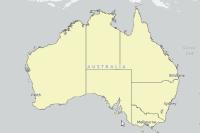

In [80]:
subjects_item = gis.content.get('1eb0511ee53a47b386e98e9c4663127b')
subjects_item

In [107]:
subjects_flayer = subjects_item.layers[2]
subjects_df = subjects_flayer.query(as_df=True)2
subjects_df.columns

Index(['OBJECTID', 'ID', 'NAME', 'AREA', 'TOTPOP_CY', 'ISO_CODE', 'ISO_SUB',
       'ISO2_CC', 'ISO3_CC', 'Shape__Area', 'Shape__Length', 'SHAPE'],
      dtype='object')

In [108]:
subjects_df

,OBJECTID,ID,NAME,AREA,TOTPOP_CY,ISO_CODE,ISO_SUB,ISO2_CC,ISO3_CC,Shape__Area,Shape__Length,SHAPE
0,1,1,New South Wales,8.008455e+05,8129009,AUNSW,NSW,AU,AUS,1.122920e+12,9.644242e+06,"{""rings"": [[[16703645.1077, -4475853.0507], [1..."
1,2,2,Victoria,2.274952e+05,6644802,AUVIC,VIC,AU,AUS,3.561376e+11,6.324012e+06,"{""rings"": [[[16285504.4721, -4744453.0384], [1..."
2,3,3,Queensland,1.730168e+06,5129791,AUQLD,QLD,AU,AUS,2.050544e+12,1.710215e+07,"{""rings"": [[[17077774.7245, -3240314.4403], [1..."
3,4,4,South Australia,9.842817e+05,1756079,AUSA,SA,AU,AUS,1.323554e+12,9.970571e+06,"{""rings"": [[[15658300.314, -4588263.1137], [15..."
4,5,5,Western Australia,2.526646e+06,2629391,AUWA,WA,AU,AUS,3.140951e+12,2.588493e+07,"{""rings"": [[[13121168.2698, -4189066.211], [13..."
5,6,6,Tasmania,6.801757e+04,536606,AUTAS,TAS,AU,AUS,1.230496e+11,9.792041e+06,"{""rings"": [[[16294077.1742, -5425368.5557], [1..."
6,7,7,Northern Territory,1.348088e+06,244543,AUNT,NT,AU,AUS,1.531500e+12,1.371298e+07,"{""rings"": [[[15259049.6029, -1788024.0168], [1..."
7,8,8,Australian Capital Territory,2.358196e+03,429263,AUACT,ACT,AU,AUS,3.564915e+09,3.760147e+05,"{""rings"": [[[16600879.9624, -4181065.9785], [1..."
8,9,9,Other Territories,6.781356e+01,397,AUACT,ACT,AU,AUS,1.016708e+08,8.228954e+04,"{""rings"": [[[16775280.3133, -4188899.7713], [1..."


In [129]:
fset_australia = df_global[df_global['Country_Region']=="Australia"]

In [146]:
len(fset_australia)

8

In [110]:
fset_australia

,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key,SHAPE
9,10,Australian Capital Territory,Australia,2022-09-11 05:20:45,-35.4735,149.0124,203680,0,125,0,None,None,"Australian Capital Territory, Australia","{""x"": 149.01240000000007, ""y"": -35.47349999999..."
10,11,New South Wales,Australia,2022-09-11 05:20:45,-33.8688,151.2093,3463759,0,5046,0,None,None,"New South Wales, Australia","{""x"": 151.2093000000001, ""y"": -33.868799999999..."
11,12,Northern Territory,Australia,2022-09-11 05:20:45,-12.4634,130.8456,96447,0,70,0,None,None,"Northern Territory, Australia","{""x"": 130.8456000000001, ""y"": -12.463399999999..."
12,13,Queensland,Australia,2022-09-11 05:20:45,-27.4698,153.0251,1620034,0,2048,0,None,None,"Queensland, Australia","{""x"": 153.02510000000007, ""y"": -27.46979999999..."
13,14,South Australia,Australia,2022-09-11 05:20:45,-34.9285,138.6007,758840,0,860,0,None,None,"South Australia, Australia","{""x"": 138.60070000000007, ""y"": -34.92849999999..."
14,15,Tasmania,Australia,2022-09-11 05:20:45,-42.8821,147.3272,246706,0,182,0,None,None,"Tasmania, Australia","{""x"": 147.32720000000006, ""y"": -42.88209999999..."
15,16,Victoria,Australia,2022-09-11 05:20:45,-37.8136,144.9631,2586290,0,5469,0,None,None,"Victoria, Australia","{""x"": 144.96310000000005, ""y"": -37.81359999999..."
16,17,Western Australia,Australia,2022-09-11 05:20:45,-31.9505,115.8605,1139054,0,626,0,None,None,"Western Australia, Australia","{""x"": 115.86050000000012, ""y"": -31.95049999999..."


In [111]:
AU_merged = pd.merge(fset_australia, subjects_df[['NAME', 'SHAPE']], left_on = "Province_State", \
                         right_on='NAME', how="left")
AU_merged[['NAME', 'Confirmed','Deaths', 'Recovered']].head(10)

,NAME,Confirmed,Deaths,Recovered
0,Australian Capital Territory,203680,125,0
1,New South Wales,3463759,5046,0
2,Northern Territory,96447,70,0
3,Queensland,1620034,2048,0
4,South Australia,758840,860,0
5,Tasmania,246706,182,0
6,Victoria,2586290,5469,0
7,Western Australia,1139054,626,0


In [112]:
AU_merged = AU_merged.drop(['SHAPE_x'], axis=1).rename(columns={"SHAPE_y": "SHAPE"})

In [113]:
map2 = gis.map("Australia", zoomlevel=4)
map2

MapView(layout=Layout(height='400px', width='100%'))

In [114]:
map1.clear_graphics()
AU_merged.spatial.plot(  kind='map', map_widget=map2,
                             renderer_type='c',  # for class breaks renderer
                             method='esriClassifyStandardDeviation',  # classification algorithm
                             class_count=7,  # choose the number of classes
                             col='Confirmed',  # numeric column to classify
                             cmap='inferno',  # color map to pick colors from for each class
                             alpha=0.7  # specify opacity
                            )

True

<Item title:"United Kingdom Countries Boundaries 2021" type:Feature Layer Collection owner:esri_dm>
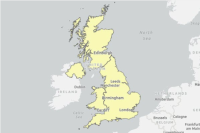

In [149]:
subjects_item = gis.content.get('605d0bb40f094264bcab01ffb3623347')
subjects_item

In [150]:
subjects_flayer = subjects_item.layers[1]
subjects_df = subjects_flayer.query(as_df=True)
subjects_df.columns

Index(['OBJECTID', 'ID', 'NAME', 'AREA', 'TOTPOP_CY', 'ISO_CODE', 'ISO_SUB',
       'ISO2_CC', 'ISO3_CC', 'Shape__Area', 'Shape__Length', 'SHAPE'],
      dtype='object')

In [151]:
subjects_df

,OBJECTID,ID,NAME,AREA,TOTPOP_CY,ISO_CODE,ISO_SUB,ISO2_CC,ISO3_CC,Shape__Area,Shape__Length,SHAPE
0,1,E92000001,England,130484.014478,55806099,GBENG,ENG,GB,GBR,3.534774e+11,1.061533e+07,"{""rings"": [[[-712342.122900002, 6422971.613], ..."
1,2,N92000002,Northern Ireland,14146.472290,1868469,GBNIR,NIR,GB,GBR,4.208725e+10,2.354773e+06,"{""rings"": [[[-629256.726300001, 7241326.3225],..."
2,3,S92000003,Scotland,78835.488860,5393690,GBSCT,SCT,GB,GBR,2.631092e+11,3.271008e+07,"{""rings"": [[[-491203.781800002, 7300071.7571],..."
3,4,W92000004,Wales,20784.747570,3128427,GBWLS,WLS,GB,GBR,5.559034e+10,3.826694e+06,"{""rings"": [[[-347426.047800001, 6688819.4126],..."


In [128]:
fset_uk = df_global[df_global['Country_Region']=="United Kingdom"]

In [130]:
fset_uk

,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key,SHAPE
705,706,Anguilla,United Kingdom,2022-09-11 05:20:45,18.220600,-63.068600,3851,0,12,0,None,None,"Anguilla, United Kingdom","{""x"": -63.06859999999995, ""y"": 18.220600000000..."
706,707,Bermuda,United Kingdom,2022-09-11 05:20:45,32.307800,-64.750500,18019,0,148,0,None,None,"Bermuda, United Kingdom","{""x"": -64.75049999999999, ""y"": 32.307800000000..."
707,708,British Virgin Islands,United Kingdom,2022-09-11 05:20:45,18.420700,-64.640000,7305,0,64,0,None,None,"British Virgin Islands, United Kingdom","{""x"": -64.63999999999999, ""y"": 18.420700000000..."
708,709,Cayman Islands,United Kingdom,2022-09-11 05:20:45,19.313300,-81.254600,30214,0,29,0,None,None,"Cayman Islands, United Kingdom","{""x"": -81.25459999999998, ""y"": 19.313300000000..."
709,710,Channel Islands,United Kingdom,2022-09-11 05:20:45,49.372300,-2.364400,0,0,0,0,None,None,"Channel Islands, United Kingdom","{""x"": -2.3643999999999323, ""y"": 49.37230000000..."
710,711,England,United Kingdom,2022-09-11 05:20:45,52.355500,-1.174300,19861556,0,174576,0,None,None,"England, United Kingdom","{""x"": -1.1742999999999597, ""y"": 52.35550000000..."
711,712,Falkland Islands (Malvinas),United Kingdom,2022-09-11 05:20:45,-51.796300,-59.523600,1886,0,0,0,None,None,"Falkland Islands (Malvinas), United Kingdom","{""x"": -59.52359999999999, ""y"": -51.79629999999..."
712,713,Gibraltar,United Kingdom,2022-09-11 05:20:45,36.140800,-5.353600,20069,0,108,0,None,None,"Gibraltar, United Kingdom","{""x"": -5.353599999999972, ""y"": 36.140800000000..."
713,714,Guernsey,United Kingdom,2022-09-11 05:20:45,49.448196,-2.589490,30883,0,62,0,None,None,"Guernsey, United Kingdom","{""x"": -2.589489999999955, ""y"": 49.448196000000..."
714,715,Isle of Man,United Kingdom,2022-09-11 05:20:45,54.236100,-4.548100,38008,0,116,0,None,None,"Isle of Man, United Kingdom","{""x"": -4.548099999999977, ""y"": 54.236100000000..."


In [132]:
UK_merged = pd.merge(fset_uk, subjects_df[['NAME', 'SHAPE']], left_on = "Province_State", \
                         right_on='NAME', how="inner")
UK_merged[['NAME', 'Confirmed','Deaths', 'Recovered']].head(10)

,NAME,Confirmed,Deaths,Recovered
0,England,19861556,174576,0
1,Northern Ireland,713294,4831,0
2,Scotland,2095171,15588,0
3,Wales,884498,10723,0


In [134]:
UK_merged = UK_merged.drop(['SHAPE_x'], axis=1).rename(columns={"SHAPE_y": "SHAPE"})

In [137]:
map3 = gis.map("UK", zoomlevel=4)
map3

MapView(layout=Layout(height='400px', width='100%'))

In [145]:
map3.clear_graphics()
UK_merged.spatial.plot(  kind='map', map_widget=map3,
                             renderer_type='c',  # for class breaks renderer
                             method='esriClassifyStandardDeviation',  # classification algorithm
                             class_count=5,  # choose the number of classes
                             col='Confirmed',  # numeric column to classify
                             cmap='inferno',  # color map to pick colors from for each class
                             alpha=0.7  # specify opacity
                            )

True

In [142]:
map3.legend = True